# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [32]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path


# Import API key
from api_keys import geoapify_key

In [33]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
csv_file = Path("C:\\Users\\adamf\\Downloads\\jupyter notebook\\python_api_challenge\\output_data\\cities.csv")
city_data_df = pd.read_csv(csv_file)

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,richards bay,-28.7830,32.0377,303.41,61,0,5.67,ZA,1709891771
1,1,beyneu,45.3167,55.2000,279.24,81,100,3.46,KZ,1709891916
2,2,nayoro,44.3506,142.4578,262.55,93,81,0.82,JP,1709891916
3,3,talnakh,69.4865,88.3972,253.82,96,100,1.80,RU,1709891916
4,4,udachny,66.4167,112.4000,262.29,85,100,2.18,RU,1709891917


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

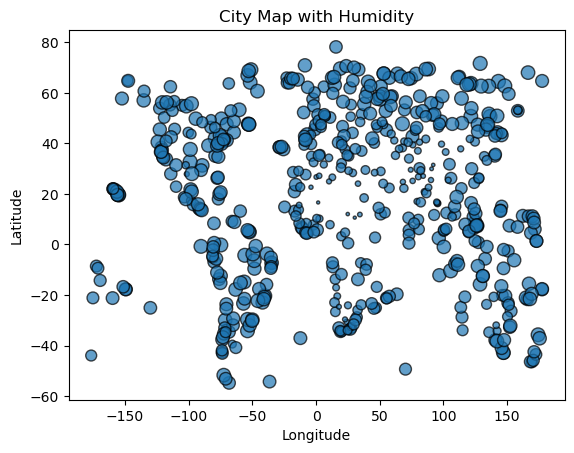

In [35]:
import matplotlib.pyplot as plt

# Configure the map plot using matplotlib
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'], alpha=0.7, edgecolors="black")

# Display the map
plt.title('City Map with Humidity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [42]:
# Narrow down cities based on simplified ideal weather conditions
simplified_ideal_conditions_df = city_data_df[
    (city_data_df["Max Temp"] > 15) & (city_data_df["Wind Speed"] < 8)
]

# Drop any rows with null values
simplified_ideal_conditions_df = simplified_ideal_conditions_df.dropna()

# Display sample data
simplified_ideal_conditions_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,richards bay,-28.7830,32.0377,303.41,61,0,5.67,ZA,1709891771
1,1,beyneu,45.3167,55.2000,279.24,81,100,3.46,KZ,1709891916
2,2,nayoro,44.3506,142.4578,262.55,93,81,0.82,JP,1709891916
3,3,talnakh,69.4865,88.3972,253.82,96,100,1.80,RU,1709891916
4,4,udachny,66.4167,112.4000,262.29,85,100,2.18,RU,1709891917


### Step 3: Create a new DataFrame called `hotel_df`.

In [44]:
# Use the Pandas copy function to create a DataFrame called hotel_df
hotel_df = ideal_conditions_df.loc[:, ["City", "Country", "Lat", "Lng", "Humidity"]].copy()

# Add an empty column, "Hotel Name," to the DataFrame
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [45]:
# Set parameters to search for a hotel
radius = 10000  # You can adjust this radius as needed
params = {
    "radius": radius,
    "type": "lodging",
    "apikey": geoapify_key,  # Assuming you have your API key stored in geoapify_key
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude, longitude from the DataFrame
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"distance(point({lng},{lat}), {radius})"
    params["bias"] = f"proximity({lng},{lat})"
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search


,City,Country,Lat,Lng,Humidity,Hotel Name


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

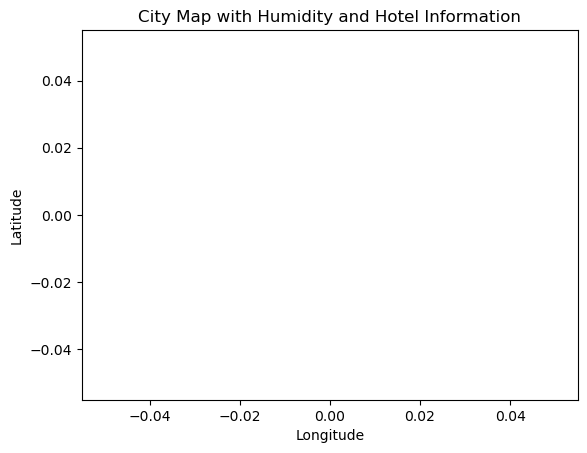

In [47]:
# Configure the map plot using matplotlib
plt.scatter(hotel_df['Lng'], hotel_df['Lat'], s=hotel_df['Humidity'], alpha=0.7, edgecolors="black")
plt.title('City Map with Humidity and Hotel Information')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the map
plt.show()
